In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split

import os 

os.getcwd()

'/Users/shinojphilipjohn/Github/data-engg-science-projects/customer_churn_ml/notebooks'

In [29]:
df=pd.read_csv("/Users/shinojphilipjohn/Github/data-engg-science-projects/customer_churn_ml/dataset/Telco-Customer-Churn_feature_engg.csv")

In [30]:

# Removing target variable and allocating
df.drop("Unnamed: 0",axis=1,inplace=True)
X=df.drop("Churn_Yes",axis=1)
y=df["Churn_Yes"]

#Since churn is imbalanced startify=y
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=14,stratify=y)

print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

      SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
6636              0      10           70.30        676.15        False   
4186              0      62          104.05       6590.50         True   
2680              0      71           85.45       6029.90         True   
5025              0       6           69.80        377.85         True   
4026              0      72          114.30       8058.55         True   

      Partner_Yes  Dependents_Yes  PhoneService_Yes  \
6636         True            True              True   
4186        False            True              True   
2680         True            True              True   
5025         True            True              True   
4026         True            True              True   

      MultipleLines_No phone service  MultipleLines_Yes  ...  \
6636                           False               True  ...   
4186                           False               True  ...   
2680                           F

In [31]:
df.isnull().sum()

SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMo

In [32]:
# Model fitting -Logistic Regression

from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression(random_state=14,max_iter=1000)
lr_model.fit(X_train,y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,14
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [33]:
#Predictions
y_pred=lr_model.predict(X_test)
y_prob=lr_model.predict_proba(X_test)[:,1]
print(y_pred)
print(y_prob)

[False False  True ... False  True False]
[0.00867905 0.20810104 0.57370683 ... 0.43374281 0.5486273  0.00346256]


In [34]:
# Evaluation Metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

print("Accuracy: ", accuracy_score(y_test,y_pred))
print("Precision: ",precision_score(y_test,y_pred))
print("Recall: ",recall_score(y_test,y_pred))
print("F1 Score: ",f1_score(y_test,y_pred))
print("Confusion Matrix: ",confusion_matrix(y_test,y_pred))
print("ROC AUC: ",roc_auc_score(y_test,y_prob))


Accuracy:  0.8076650106458482
Precision:  0.6574923547400612
Recall:  0.5748663101604278
F1 Score:  0.6134094151212554
Confusion Matrix:  [[923 112]
 [159 215]]
ROC AUC:  0.8532550569634967


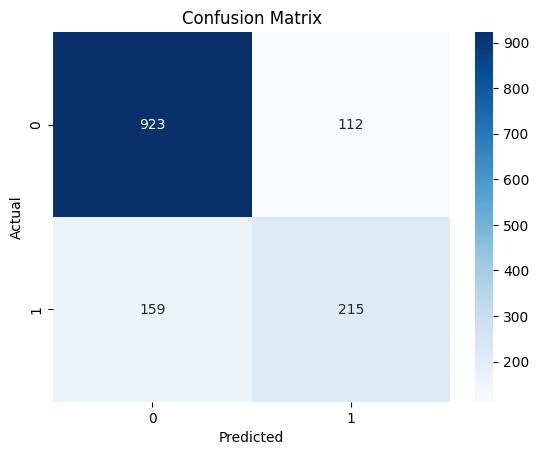

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.85      0.89      0.87      1035
        True       0.66      0.57      0.61       374

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



In [37]:
#Reflection

# Recall is lesser than Precision likely due to class imbalance.
# Can use better models and tuning.
# ROC-AUC Score is good.

In [38]:
coef=pd.DataFrame({
    "features":X_train.columns,
    "coefficients":lr_model.coef_[0]
})


print(coef)

postive_coef=coef[coef["coefficients"]>=0]
postive_coef=postive_coef.sort_values("coefficients",ascending=False)
neg_coef=coef[coef["coefficients"]<0]
neg_coef=neg_coef.sort_values("coefficients",ascending=False)
print("\n")
print(postive_coef)
print("\n")
print(neg_coef)

                                 features  coefficients
0                           SeniorCitizen      0.211123
1                                  tenure     -0.057355
2                          MonthlyCharges      0.003153
3                            TotalCharges      0.000295
4                             gender_Male      0.012077
5                             Partner_Yes     -0.020812
6                          Dependents_Yes     -0.088320
7                        PhoneService_Yes     -0.509840
8          MultipleLines_No phone service      0.302386
9                       MultipleLines_Yes      0.286281
10            InternetService_Fiber optic      0.688390
11                     InternetService_No     -0.089603
12     OnlineSecurity_No internet service     -0.089603
13                     OnlineSecurity_Yes     -0.454596
14       OnlineBackup_No internet service     -0.089603
15                       OnlineBackup_Yes     -0.183247
16   DeviceProtection_No internet service     -0

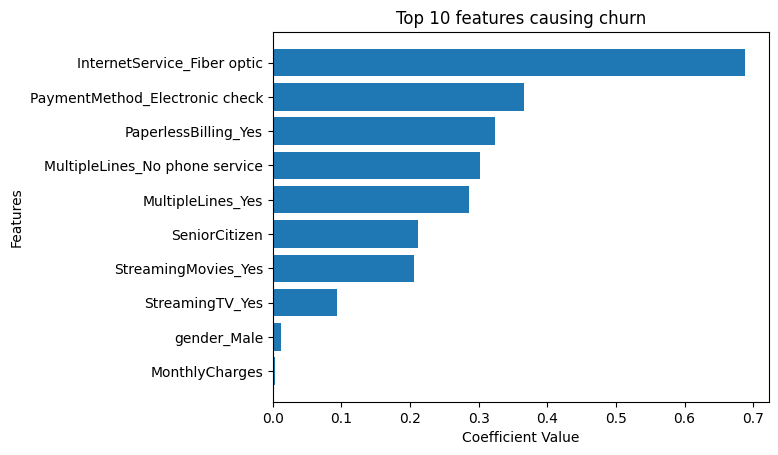

In [39]:
top_10=postive_coef.head(10)

import matplotlib.pyplot as plt

plt.barh(top_10["features"],top_10["coefficients"])
plt.title("Top 10 features causing churn")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.gca().invert_yaxis()
plt.show()


In [40]:

# The features which cause churn are found to be customers using Fiber Optic service users as competition might be more followed by cusomters using electronic check as payment method and also 
# customer using paperless billing since these customers are more likely to be more digitally aware and hence can be more likely to switch. Also customers who are using streaming movies and tv
#  are likely to churn mostly due to higher bills.

# Features which have negative churn thus customers less likely to churn are if they are on contracts which are longer like one or two year contracts, also if the online security and tech support 
# is good and if the Autopay on credit card is availed.

In [41]:
# Additional feature engg
df['tenure_bucket']=pd.cut(df["tenure"],
                           bins=[0,6,12,24,48,100],
                           labels=['0-6','6-12','12-24','24-48','48+'],
                           include_lowest=True)
df=pd.get_dummies(df,columns=['tenure_bucket'],drop_first=True)

In [42]:
df


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,tenure_bucket_6-12,tenure_bucket_12-24,tenure_bucket_24-48,tenure_bucket_48+
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,True,False,True,False,False,False,False,False,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,True,False
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,True,False,False,True,True,False,False,False,False
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,True,False,True,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,True,True,True,True,False,True,...,False,True,False,False,True,False,False,True,False,False
7039,0,72,103.20,7362.90,False,True,True,True,False,True,...,False,True,True,False,False,False,False,False,False,True
7040,0,11,29.60,346.45,False,True,True,False,True,False,...,False,True,False,True,False,False,True,False,False,False
7041,1,4,74.40,306.60,True,True,False,True,False,True,...,False,True,False,False,True,True,False,False,False,False


In [43]:
# Getting value from 4 columns
four_cols = [
    'OnlineSecurity_No internet service',
    'OnlineBackup_No internet service',
    'DeviceProtection_No internet service',
    'TechSupport_No internet service'
]

df['no_services_count'] = df[four_cols].sum(axis=1)
df[df['no_services_count']>0].count()


SeniorCitizen                            1526
tenure                                   1526
MonthlyCharges                           1526
TotalCharges                             1526
gender_Male                              1526
Partner_Yes                              1526
Dependents_Yes                           1526
PhoneService_Yes                         1526
MultipleLines_No phone service           1526
MultipleLines_Yes                        1526
InternetService_Fiber optic              1526
InternetService_No                       1526
OnlineSecurity_No internet service       1526
OnlineSecurity_Yes                       1526
OnlineBackup_No internet service         1526
OnlineBackup_Yes                         1526
DeviceProtection_No internet service     1526
DeviceProtection_Yes                     1526
TechSupport_No internet service          1526
TechSupport_Yes                          1526
StreamingTV_No internet service          1526
StreamingTV_Yes                   

In [44]:
df['high_bill_customer']=(df['MonthlyCharges']>df['MonthlyCharges'].quantile(0.8)).astype(int)

In [45]:
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,tenure_bucket_6-12,tenure_bucket_12-24,tenure_bucket_24-48,tenure_bucket_48+,no_services_count,high_bill_customer
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,True,False,False,False,False,False,False,0,0
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,True,False,False,False,True,False,0,0
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,True,True,False,False,False,False,0,0
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,False,False,False,True,False,0,0
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,True,False,True,False,False,False,False,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,True,True,True,True,False,True,...,False,False,True,False,False,True,False,False,0,0
7039,0,72,103.20,7362.90,False,True,True,True,False,True,...,True,False,False,False,False,False,False,True,0,1
7040,0,11,29.60,346.45,False,True,True,False,True,False,...,False,True,False,False,True,False,False,False,0,0
7041,1,4,74.40,306.60,True,True,False,True,False,True,...,False,False,True,True,False,False,False,False,0,0


In [46]:
df.isna().sum()

SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No internet service     0
DeviceProtection_Yes                     0
TechSupport_No internet service          0
TechSupport_Yes                          0
StreamingTV_No internet service          0
StreamingTV_Yes                          0
StreamingMovies_No internet service      0
StreamingMo

In [47]:
df.to_csv("/Users/shinojphilipjohn/Github/data-engg-science-projects/customer_churn_ml/dataset/Telco-Customer-Churn_feature_engg_2.csv",index=False)